# Installing and imorting necessary libraries

In [ ]:
!pip install graphviz
!pip install pydotplus

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from  io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/drug200.csv')
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [ ]:
data.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Exploratory Data Analysis

Histogram analysis for numerical veriables

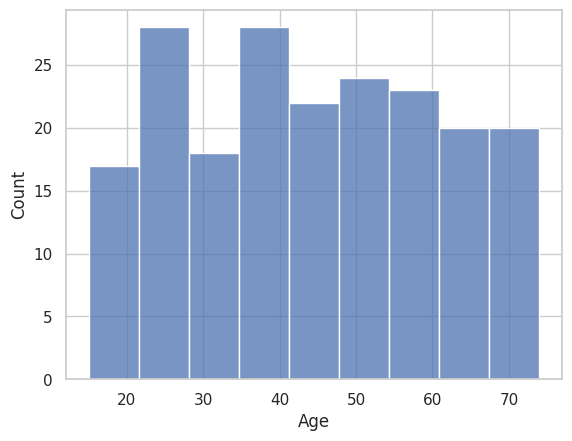

In [ ]:
sns.histplot(x='Age', data=data )
plt.show()

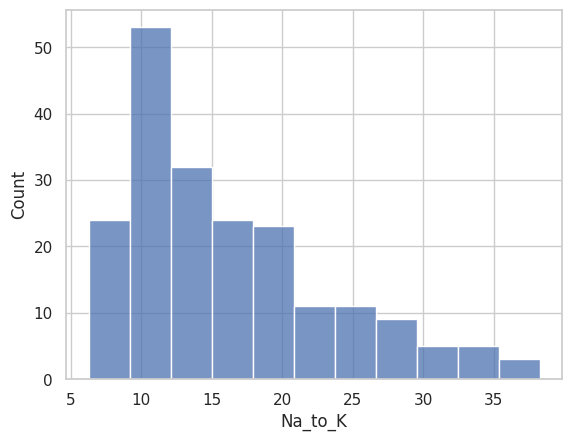

In [ ]:
sns.histplot(x='Na_to_K', data=data )
plt.show()

Barplot analysis for categorical variables

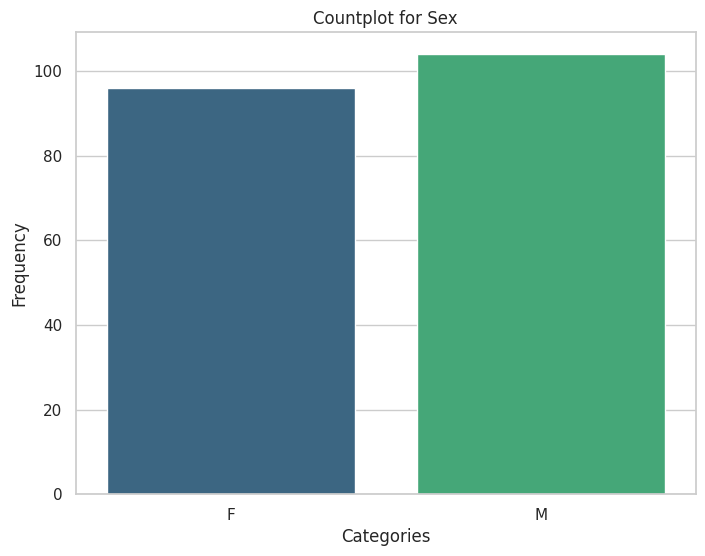

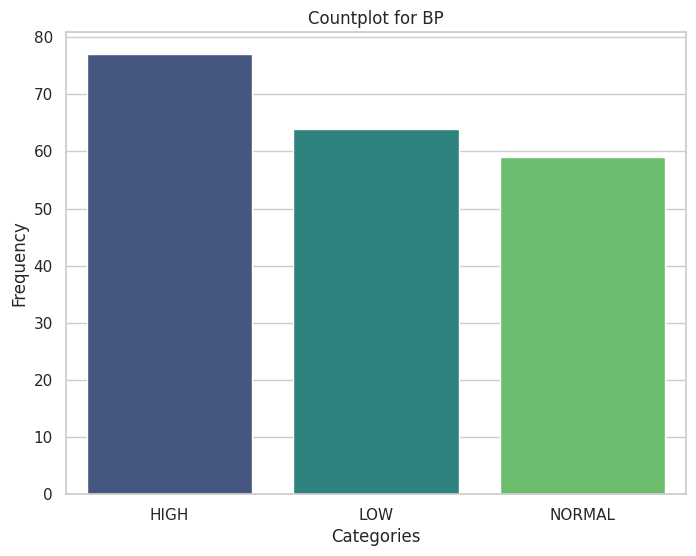

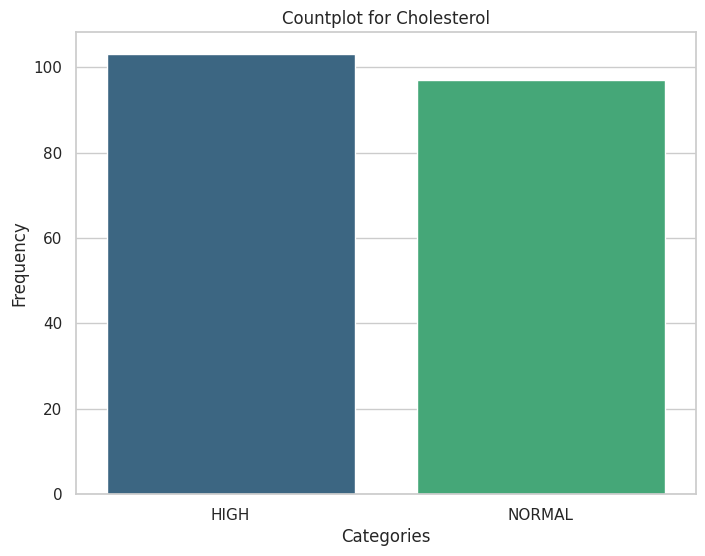

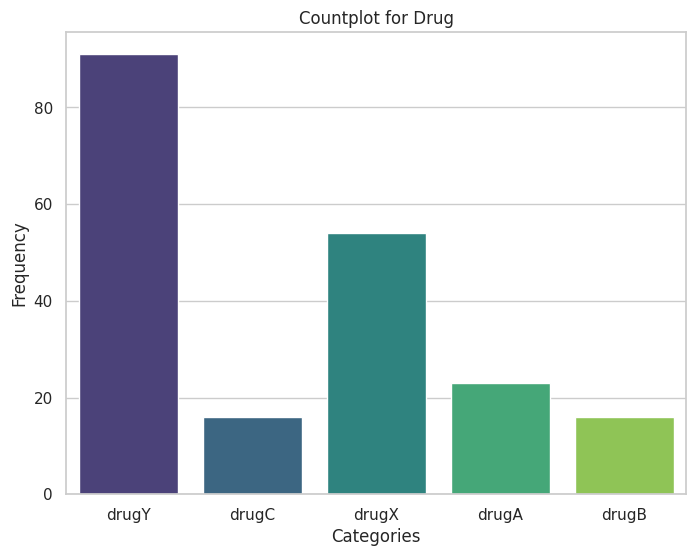

In [ ]:
#Categorical Variable
for column in data.select_dtypes(include=[object]).columns:
        sns.set(style="whitegrid")
        plt.figure(figsize=(8, 6))
        sns.countplot(x=data[column], palette="viridis")
        plt.title(f"Countplot for {column}")
        plt.xlabel("Categories")
        plt.ylabel("Frequency")
        plt.xticks(rotation=0)
        plt.show()

<Axes: xlabel='Drug', ylabel='Age'>

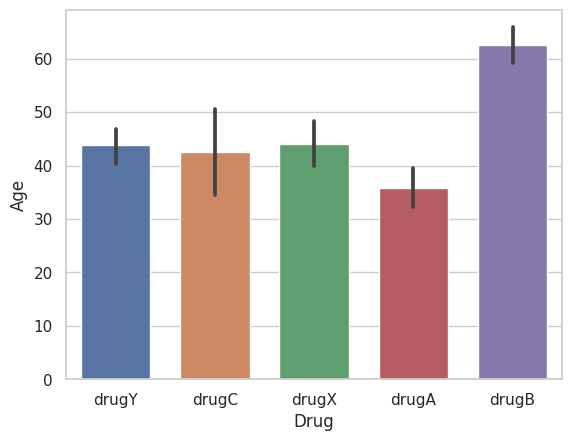

In [ ]:
sns.barplot(data=data, x="Drug", y="Age",orient='v',linewidth=1, width = 0.7,dodge=True)

<Axes: xlabel='Drug', ylabel='Na_to_K'>

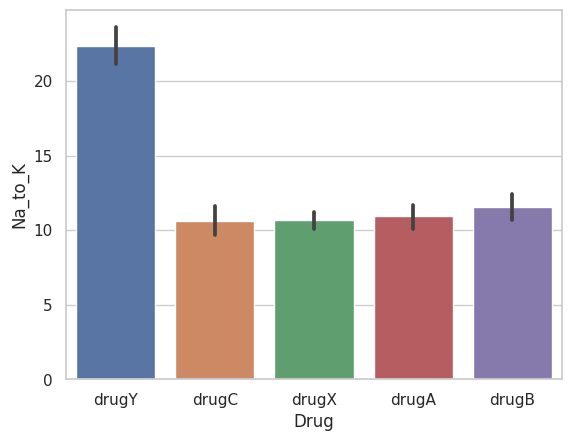

In [ ]:
sns.barplot(data=data, x="Drug", y="Na_to_K")

Boxplot analysis

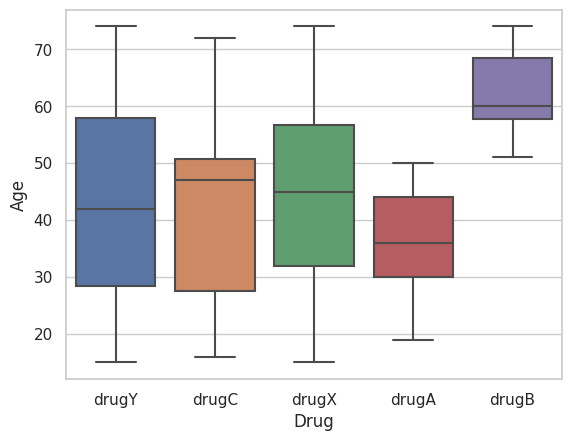

In [ ]:
sns.boxplot(x= "Drug", y="Age", data = data)
plt.show()

# Data preparation

Encoding the categorical variables

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['Sex'] = label_encoder.fit_transform(data['Sex'])
data['BP'] = label_encoder.fit_transform(data['BP'])
data['Cholesterol'] = label_encoder.fit_transform(data['Cholesterol'])
data['Drug'] = label_encoder.fit_transform(data['Drug'])

In [ ]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4


Seperating the target variable

In [ ]:
y = data["Drug"]
X = data.drop(["Drug"], axis=1)

In [ ]:
# Split the data into training and testing sets (adjust test_size and random_state)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train.value_counts(normalize=True)

4    0.47500
3    0.26875
0    0.10625
1    0.08125
2    0.06875
Name: Drug, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

4    0.375
3    0.275
0    0.150
2    0.125
1    0.075
Name: Drug, dtype: float64

Model building based on gini index

In [ ]:
dt_model = DecisionTreeClassifier(criterion ="gini",random_state = 10,max_depth=3, min_samples_leaf=5)

In [ ]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5, random_state=10)

In [ ]:
dt_model.score(X_train,y_train)

0.93125

In [ ]:
dt_model.score(X_test,y_test)

0.875

In [ ]:
y_pred = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.875

Fine tunning the parameters

In [ ]:
train_accuracy = []
validation_accuracy = []
for depth in range(1,10):
  dt_model =DecisionTreeClassifier(max_depth=depth, random_state=10)
  dt_model.fit(X_train,y_train)
  train_accuracy.append(dt_model.score(X_train,y_train))
  validation_accuracy.append(dt_model.score(X_test,y_test))

In [ ]:
trees= pd.DataFrame({'max_depth':range(1,10),'train_acc':train_accuracy,"valid_acc":validation_accuracy})
trees.head()

,max_depth,train_acc,valid_acc
0,1,0.74375,0.650
1,2,0.85000,0.800
2,3,0.93125,0.875
3,4,1.00000,1.000
4,5,1.00000,1.000


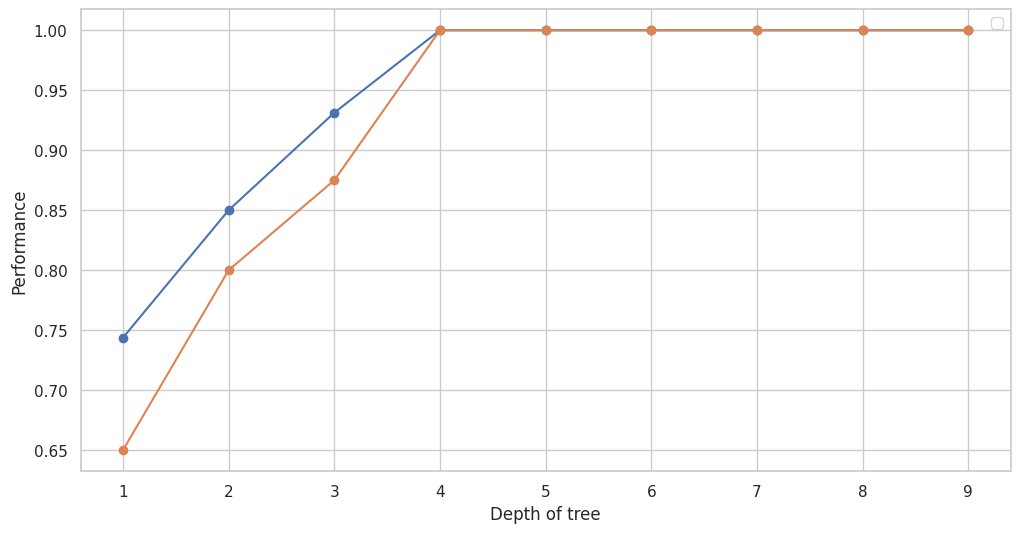

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,6))
plt.plot(trees['max_depth'],trees['train_acc'],marker='o')
plt.plot(trees['max_depth'],trees['valid_acc'],marker='o')
plt.xlabel("Depth of tree")
plt.ylabel("Performance")
plt.legend()

In [ ]:
decision_tree=tree.export_graphviz(dt_model,out_file='tree.dot',feature_names=X_train.columns,max_depth=5,filled=True)

In [ ]:
!dot -Tpng tree.dot -o tree.png

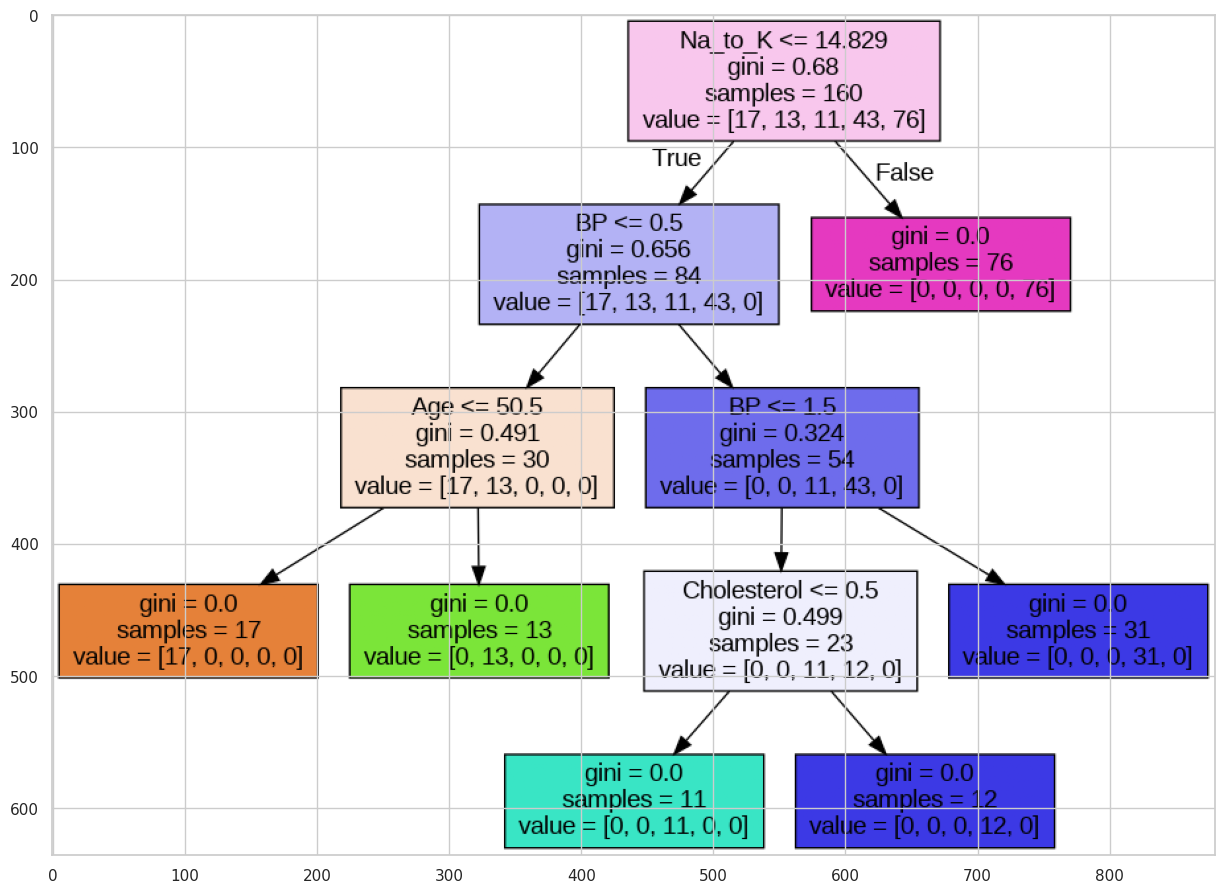

In [ ]:
image=plt.imread('tree.png')
plt.figure(figsize=(15,15))
plt.imshow(image)

Building Random forest model based on entrophy

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
rfmodel = RandomForestClassifier(n_estimators=100, criterion='entropy',random_state=1)

In [ ]:
rfmodel.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', random_state=1)

In [ ]:
rf_predict=rfmodel.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
rfmodel_accuracy = round(metrics.accuracy_score(y_test,rf_predict)*100,2)
print(rfmodel_accuracy)

100.0


In [ ]:
ConfusionMatrix_rf = confusion_matrix(y_test, rf_predict)
print(ConfusionMatrix_rf)

[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]


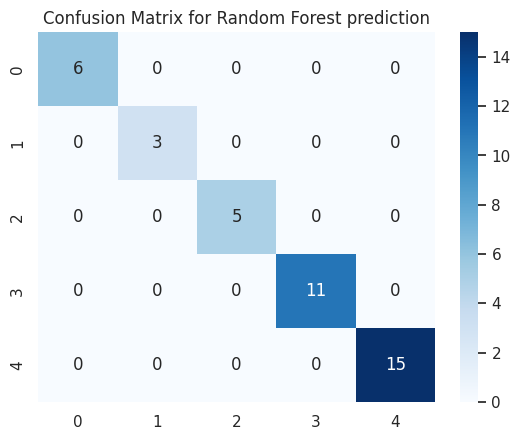

In [ ]:
matrix_rf=sns.heatmap(ConfusionMatrix_rf,annot=True,cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Random Forest prediction')
plt.show(matrix_rf)
plt.show()

In [ ]:
!jupyter nbconvert --to html /content/drive/MyDrive/Colab/DecisionTree.ipynb

[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab/DecisionTree.ipynb to html
[NbConvertApp] Writing 1289090 bytes to /content/drive/MyDrive/Colab/DecisionTree.html
